In [1]:
# load and summarize the diabets dataset
from pandas import read_csv
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# load the datset
dataset = read_csv('diabetes.csv', header=0)
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# summarize the shape of the dataset
print(dataset.shape)

(768, 9)


In [4]:
# summarize each variable
print(dataset.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

[None, None, None, None, None, None, None, None, None]

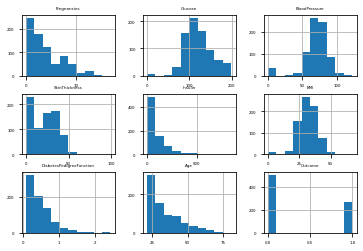

In [5]:
# histogram of the variables 
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

In [6]:
# now we fit and evaluate a machin learnng algorithm model and use k-nearest neighbor algorihm
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [7]:
data = dataset.values

In [8]:
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]

In [9]:
# ensure inputs are fleats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

In [10]:
#  define and the configure the model
model = KNeighborsClassifier()

In [11]:
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [12]:
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [13]:
print('accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

accuracy: 0.717 (0.040)


In [14]:
# we can try MinMaxScaler Transform to cpate the accuarcy
# retrieve just the numeric input values
data = dataset.values[:, :-1]

In [15]:
from sklearn .preprocessing import MinMaxScaler
from pandas import DataFrame
from matplotlib import pyplot

In [16]:
# perform a roboust scaler transform of the dataset
trans = MinMaxScaler()
data = trans.fit_transform(data)

In [17]:
# convert the array back to a dataframe
dataset = DataFrame(data)

In [18]:
# summarize
print(dataset.describe())

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.226180    0.607510    0.566438    0.207439    0.094326    0.476790   
std      0.198210    0.160666    0.158654    0.161134    0.136222    0.117499   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.058824    0.497487    0.508197    0.000000    0.000000    0.406855   
50%      0.176471    0.587940    0.590164    0.232323    0.036052    0.476900   
75%      0.352941    0.704774    0.655738    0.323232    0.150414    0.545455   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6           7  
count  768.000000  768.000000  
mean     0.168179    0.204015  
std      0.141473    0.196004  
min      0.000000    0.000000  
25%      0.070773    0.050000  
50%      0.125747    0.133333  
75%      0.234095    0.333333  
max      1.000

[None, None, None, None, None, None, None, None, None]

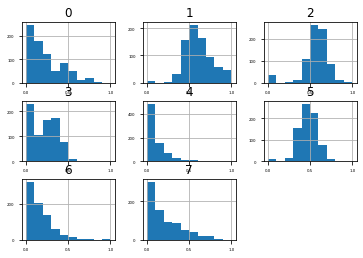

In [19]:
# histogam of the varibale 
fif = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

In [20]:
# we can confirm that the minimum values are not and one respectively as we expected
from sklearn.pipeline import Pipeline

In [21]:
# lets try to evaluate KNN Model 
#define the pipeline
trans =MinMaxScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])

In [22]:
# evaluate the piprline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline,X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [23]:
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores))) 

Accuracy: 0.739 (0.053)


In [24]:
# now we try to StandardScaler Transform, we will use the defult configuration and scale 
# values to subtract the mean to center them on 0.0 and divide by the standard deviation to give the standard deviation of1.0
from sklearn.preprocessing import StandardScaler

In [25]:
# perform a roboust scaler transform of the dataset
trans = StandardScaler()
data = trans.fit_transform(data)

In [26]:
# retrieve just the numeric input values
data = dataset.values[:, :-1]

In [27]:
# convert the array back to a dataframe
dataset = DataFrame(data)

In [28]:
# summarize
print(dataset.describe())

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.226180    0.607510    0.566438    0.207439    0.094326    0.476790   
std      0.198210    0.160666    0.158654    0.161134    0.136222    0.117499   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.058824    0.497487    0.508197    0.000000    0.000000    0.406855   
50%      0.176471    0.587940    0.590164    0.232323    0.036052    0.476900   
75%      0.352941    0.704774    0.655738    0.323232    0.150414    0.545455   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6  
count  768.000000  
mean     0.168179  
std      0.141473  
min      0.000000  
25%      0.070773  
50%      0.125747  
75%      0.234095  
max      1.000000  


# histogam of the varibale 
fif = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

In [29]:
# evaluate the smae KNN Model
# define the pipeline
trans = StandardScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])

In [30]:
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline,X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [31]:
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores))) 

Accuracy: 0.741 (0.050)


# we can see that the StandardScaler transform results in a lift in performnace from 71.7 percent.
# without transform to about 74.1 perecnt with the transform, slightly higher than the using MinMaxScaler that achived 73.9